# Adam Thomson - PHY573 - Week 6

## Shor's Algorithm

Shor’s code stands as one of the remarkable achievements showing the potential of Quantum Computing. There are several components to the code. Be sure that you can interpret each of them and can describe how the algorithm is constructed from the components. Using the qiskit tutorial for Shor's algorithm, https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/shor.ipynb, do the following:

a) Copy the code from Shor’s Algorithm in Qiskit into your Python notebook

b) Do the exercise at the end of Qiskit (Shor) section 3. 

c) Code the example of modular exponentiation in section 4, with full documentation and interpretation.

d) Code the example of factoring Sec 5, with full documentation and interpretation.

In [226]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from fractions import Fraction
from math import gcd
from numpy.random import randint
from IPython.display import Math, HTML
from qiskit import QuantumCircuit as QCir, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

# Initialize local simulator
sampler = AerSimulator()

# Declare shortcut function
def dm(x):
    return display(Math(x))

### 1. The Problem: Period Finding

In [227]:
# Describe the problem statement
dm(r"\text{Consider the periodic function } f(x) = a^x \bmod N")
dm(r"\text{Where } a, N \isin \Z^+; a < N; \text{ gcd}(a, N) = 1")
dm(r"\text{This means } \exists r \isin \Z^+ \text{ such that } a^r \bmod N = 1")
dm(r"\text{We need to find the smallest } r, \text{ known as the 'period' of the function.}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

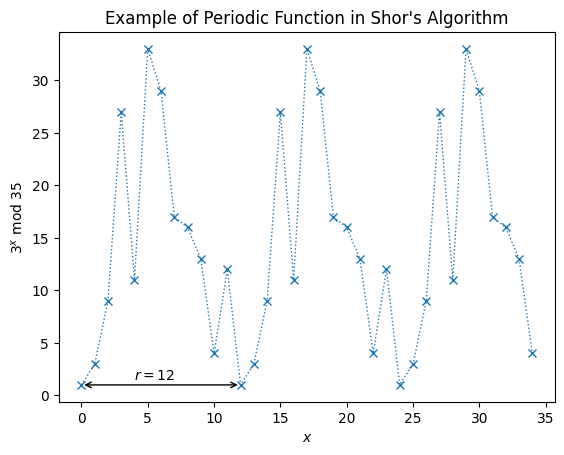

In [228]:
# Demonstrate periodicity via graph, directly from tutorial
N = 35
a = 3

# Calculate the plotting data
xvals = np.arange(35)
yvals = [np.mod(a**x, N) for x in xvals]

# Use matplotlib to display it nicely
fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted', marker='x')
ax.set(xlabel='$x$', ylabel=f'${a}^x$ mod ${N}$',
       title="Example of Periodic Function in Shor's Algorithm")
try: # plot r on the graph
    r = yvals[1:].index(1) + 1
    plt.annotate('', xy=(0,1), xytext=(r,1),
                 arrowprops=dict(arrowstyle='<->'))
    plt.annotate(f'$r={r}$', xy=(r/3,1.5))
except ValueError:
    print('Could not find period, check a < N and have no common factors.')

### 2. The Solution

In [229]:
# Explain the quantum solution
dm(r"\text{Shor's approach was to use quantum phase estimation on the unitary operator: } U\ket{y} = \ket{ay\bmod N}")
dm(r"\text{To demonstrate why this is useful, let's examine what an eigenstate of U could look like.}")
dm(r"""
\text{Consider starting with the state } \ket{1} \text{, then each application of U will multiply
the state of the register by } a\bmod N
""")
dm(r"\text{So after } r \text{ applications we will arrive at the state } \ket{1} \text{ again.}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [230]:
# Example of function period finding
def f_modn(_y, _a, _N):
    return (_y*_a) % _N

a = 3
N = 35
y, fy = 1, f_modn(1, a, N)
i = 1

while fy > 1:
    dm(r"U^{{i}} \ket{{y}} = \ket{{fy}}"
                 .replace('{i}', str(i))
                 .replace('{y}', str(y))
                 .replace('{fy}', str(fy)))
    y = fy
    fy = f_modn(y, a, N)
    i+=1

dm(r"U^{{i}} \ket{{y}} = \ket{{fy}}"
    .replace('{i}', str(i))
    .replace('{y}', str(y))
    .replace('{fy}', str(fy)))
dm(r"\text{We've arrived back at } \ket{1} \text{ after 12 iterations, as expected}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

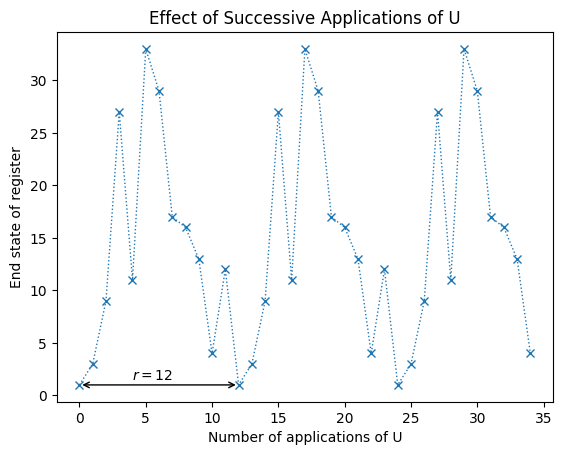

In [231]:
# Replot the graph with new labels
ax.set(xlabel='Number of applications of U',
       ylabel='End state of register',
       title="Effect of Successive Applications of U")
fig

In [232]:
dm(r"\text{Thus, a superposition of states in this cycle } \ket{u_0} \text{ would be an eigenstate of } U:")
dm(r"\ket{u_0} = \frac1{\sqrt{r}} \sum_{k=0}^{r-1} \ket{a^k \bmod N}")
dm(r"\text{For example, using the previous } a=3; N=35")
dm(r"\ket{u_0} = \frac1{\sqrt{12}} (\ket{1} + \ket{3} + \ket{9} + ... + \ket{4} + \ket{12})")
dm(r"U\ket{u_0} = \frac1{\sqrt{12}} (U\ket{1} + U\ket{3} + U\ket{9} + ... + U\ket{4} + U\ket{12})")
dm(r"\qquad = \frac1{\sqrt{12}} (\ket{3} + \ket{9} + ... + \ket{4} + \ket{12} + \ket{1})")
dm(r"\qquad = \ket{u_0}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [233]:
# More interesting example
dm(r"\text{This confirms that } \ket{u_0} \text{ is an eigenstate of U! However, this eigenstate has an eigenvalue of 1 which isn't very interesting.}")
dm(r"\text{Let's take a closer look at an eigenstate where the phase is different for each computational basis.}")
dm(r"\text{Specifically, we'll look at the case where the phase of the } k^{\text{th}} \text{ state is proportional to } k")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [234]:
# Demonstrate example of applying phase estimation
dm(r"\ket{u_1} = \frac1{\sqrt r} \sum_{k=0}^{r-1} e^{-\frac{2\pi i k}r} \ket{a^k \bmod N}")
dm(r"U\ket{u_1} = e^{\frac{2 \pi i}r} \ket{u_1}")
dm(r"\text{For example, when } a=3; N=35")
dm(r"""
\ket{u_1} = \frac{1}{\sqrt{12}} 
   (\ket{1} + e^{-\frac{2 \pi i}{12}} \ket{3} + e^{-\frac{4 \pi i}{12}} \ket{9}
    + ... + e^{-\frac{20 \pi i}{12}} \ket{4} + e^{-\frac{22 \pi i}{12}} \ket{12})
""")
dm(r"""
U\ket{u_1} = \frac{1}{\sqrt{12}} 
   (U\ket{1} + e^{-\frac{2 \pi i}{12}} U\ket{3} + e^{-\frac{4 \pi i}{12}} U\ket{9}
    + ... + e^{-\frac{20 \pi i}{12}} U\ket{4} + e^{-\frac{22 \pi i}{12}} U\ket{12})
""")
dm(r"""
\qquad = \frac{1}{\sqrt{12}} 
   (\ket{3} + e^{-\frac{2 \pi i}{12}} \ket{9} + e^{-\frac{4 \pi i}{12}} \ket{27}
    + ... + e^{-\frac{20 \pi i}{12}} \ket{12} + e^{-\frac{22 \pi i}{12}} \ket{1})
""")
dm(r"""
\qquad = \frac{1}{\sqrt{12}} 
   (e^{\frac{2 \pi i}{12}} e^{-\frac{2 \pi i}{12}} \ket{3} + 
   e^{\frac{2 \pi i}{12}} e^{-\frac{4 \pi i}{12}} \ket{9} + 
   e^{\frac{2 \pi i}{12}} e^{-\frac{6 \pi i}{12}} \ket{27} + ... +
   e^{\frac{2 \pi i}{12}} e^{-\frac{22 \pi i}{12}} \ket{12} + 
   e^{\frac{2 \pi i}{12}} e^{-\frac{24 \pi i}{12}} \ket{1})
""")
dm(r"""
U\ket{u_1} = e^{\frac{2 \pi i}{12}} \frac{1}{\sqrt{12}} 
   (e^{-\frac{2 \pi i}{12}} \ket{3} + e^{-\frac{4 \pi i}{12}} \ket{9} + ... + 
    e^{-\frac{20 \pi i}{12}} \ket{4} + e^{-\frac{22 \pi i}{12}} \ket{12} + e^{-\frac{24 \pi i}{12}}\ket{1})
""")
dm(r"\text{Since } -\frac{24}{12} \text{ is a multiple of 2, } e^{-\frac{24 \pi i}{12}} = 1;  e^{-\frac{24 \pi i}{12}}\ket{1} = \ket{1}")
dm(r"\text{We rearrange terms to confirm that } U\ket{u_1} = e^{\frac{2 \pi i}{12}} \ket{u_1} \text{ and extract } r=12")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [235]:
# Describe eigenstates in general
dm(r"""
\text{There are other eigenstates with the same behaviour; in general, we can multiply an integer } s 
\text{ to this phase difference, which will show up in the eigenvalue as}
""")
dm(r"\ket{u_s} = \frac1{\sqrt{r}} \sum_{k=0}^{r-1}e^{-\frac{2 \pi i s k}r} \ket{a^k \bmod N}")
dm(r"U \ket{u_s} = e^{\frac{2 \pi i s}r} \ket{u_s}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [236]:
# Demonstrate example of general eigenstate
dm(r"\text{For example, when } a=3; N=35")
dm(r"""
\ket{u_s} = \frac{1}{\sqrt{12}} 
   (\ket{1} + e^{-\frac{2 \pi i s}{12}} \ket{3} + e^{-\frac{4 \pi i s}{12}} \ket{9}
    + ... + e^{-\frac{20 \pi i s}{12}} \ket{4} + e^{-\frac{22 \pi i s}{12}} \ket{12})
""")
dm(r"""
U\ket{u_s} = \frac{1}{\sqrt{12}} 
   (U\ket{1} + e^{-\frac{2 \pi i s}{12}} U\ket{3} + e^{-\frac{4 \pi i s}{12}} U\ket{9}
    + ... + e^{-\frac{20 \pi i s}{12}} U\ket{4} + e^{-\frac{22 \pi i s}{12}} U\ket{12})
""")
dm(r"""
\qquad = \frac{1}{\sqrt{12}} 
   (\ket{3} + e^{-\frac{2 \pi i s}{12}} \ket{9} + e^{-\frac{4 \pi i s}{12}} \ket{27}
    + ... + e^{-\frac{20 \pi i s}{12}} \ket{12} + e^{-\frac{22 \pi i s}{12}} \ket{1})
""")
dm(r"""
\qquad = \frac{1}{\sqrt{12}} 
   (e^{\frac{2 \pi i s}{12}} e^{-\frac{2 \pi i s}{12}} \ket{3} + 
   e^{\frac{2 \pi i s}{12}} e^{-\frac{4 \pi i s}{12}} \ket{9} + 
   e^{\frac{2 \pi i s}{12}} e^{-\frac{6 \pi i s}{12}} \ket{27} + ... +
   e^{\frac{2 \pi i s}{12}} e^{-\frac{22 \pi i s}{12}} \ket{12} + 
   e^{\frac{2 \pi i s}{12}} e^{-\frac{24 \pi i s}{12}} \ket{1})
""")
dm(r"""
U\ket{u_s} = e^{\frac{2 \pi i s}{12}} \frac{1}{\sqrt{12}} 
   (e^{-\frac{2 \pi i s}{12}} \ket{3} + e^{-\frac{4 \pi i s}{12}} \ket{9} + ... + 
    e^{-\frac{20 \pi i s}{12}} \ket{4} + e^{-\frac{22 \pi i s}{12}} \ket{12} + e^{-\frac{24 \pi i s}{12}}\ket{1})
""")
dm(r"\text{Since } -\frac{24}{12} \text{ is a multiple of 2, } e^{-\frac{24 \pi i s}{12}} = 1;  e^{-\frac{24 \pi i s}{12}}\ket{1} = \ket{1}")
dm(r"\text{We rearrange terms to confirm that } U\ket{u_s} = e^{\frac{2 \pi i s}{12}} \ket{u_s} \text{ and extract } r=12")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [237]:
# Explain results
dm(r"\text{This means we now have a unique eigenstate for each integer } s \text{ where } 0 \leq s \leq r-1")
dm(r"\text{However, if we sum all of these eigenstates, the different phases cause cancellations for all terms except } \ket1")
dm(r"\text{Leaving us with } \frac1{\sqrt{r}} \sum_{s=0}^{r-1} \ket{u_s} = \ket{1}")
dm(r"\text{Let's examine this with the full exansion for a smaller example.}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [238]:
# Example of phase cancellation
dm(r"\text{In this case: } a=7, N=15 \rarr r=4")
dm(r"""
\sum_{s=0}^{r-1} \ket{u_s} = \frac1{\sqrt4} \Big( 
    \ket{u_0} + \ket{u_1} + \ket{u_2} + \ket{u_3}
\Big)""")
dm(r"""
\qquad = \frac12 \Big(
\frac12 (\ket1 + \ket7 + \ket4 + \ket{13})
\\\\\hskip{3.6em} + \frac12 (\ket{1} + e^{-\frac{2 \pi i}4}\ket7 + e^{-\frac{4 \pi i}4}\ket4 + e^{-\frac{6 \pi i}4}\ket{13}) 
\\\\\hskip{3.6em} + \frac12 (\ket{1} + e^{-\frac{4 \pi i}4}\ket7 + e^{-\frac{8 \pi i}4}\ket4 + e^{-\frac{12 \pi i}4}\ket{13}) 
\\\\\hskip{3.6em} + \frac12 (\ket{1} + e^{-\frac{6 \pi i}4}\ket7 + e^{-\frac{12 \pi i}4}\ket4 + e^{-\frac{18 \pi i}4}\ket{13}) 
\Big)
""")
dm(r"\text{Note that the coefficients for all terms except } \ket{1} \text{ sum to } 0")
dm(r"\sum_{s=0}^{r-1} \ket{u_s} = \frac12 \big( \frac12 \ket1 + \frac12 \ket1 + \frac12 \ket1 + \frac12 \ket1 \big) = \ket1")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [239]:
# Exand on findings
dm(r"""\text{Because the computationation basis state } \ket1 \text{ is a superposition of all possible eigenstates,}
\\\\\text{performing QPE on U with the state } \ket1 \text{ will result in measuring one possible phase: } \phi = \frac{s}{r}""")
dm(r"""\text{Where } 0 \leq s \leq r-1. \text{By using the continued fractions algorithm on } \phi \text{ we can find } r.
\\\\\text{Refer to the circuit diagram included in qiskit's tutorial for a generalized visualization.}""")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 3. Qiskit Implementation

In [240]:
# Setup the implementation
dm(r"\text{We will now construct a quantum circuit in qiskit to solve for the example of } a=7, N=15")
dm(r"\text{The circuit for U such that } U\ket{y} = \ket{ay \bmod 15} \text{ is provided, but later we will construct one.}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [241]:
# Define the circuit for U
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QCir(4)
    for _iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    c_U = U.control()
    return c_U

In [242]:
# Specify constants
N_COUNT = 8 # counting bits
a = 7

In [243]:
# Define the QFT circuit
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QCir(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

<IPython.core.display.Math object>

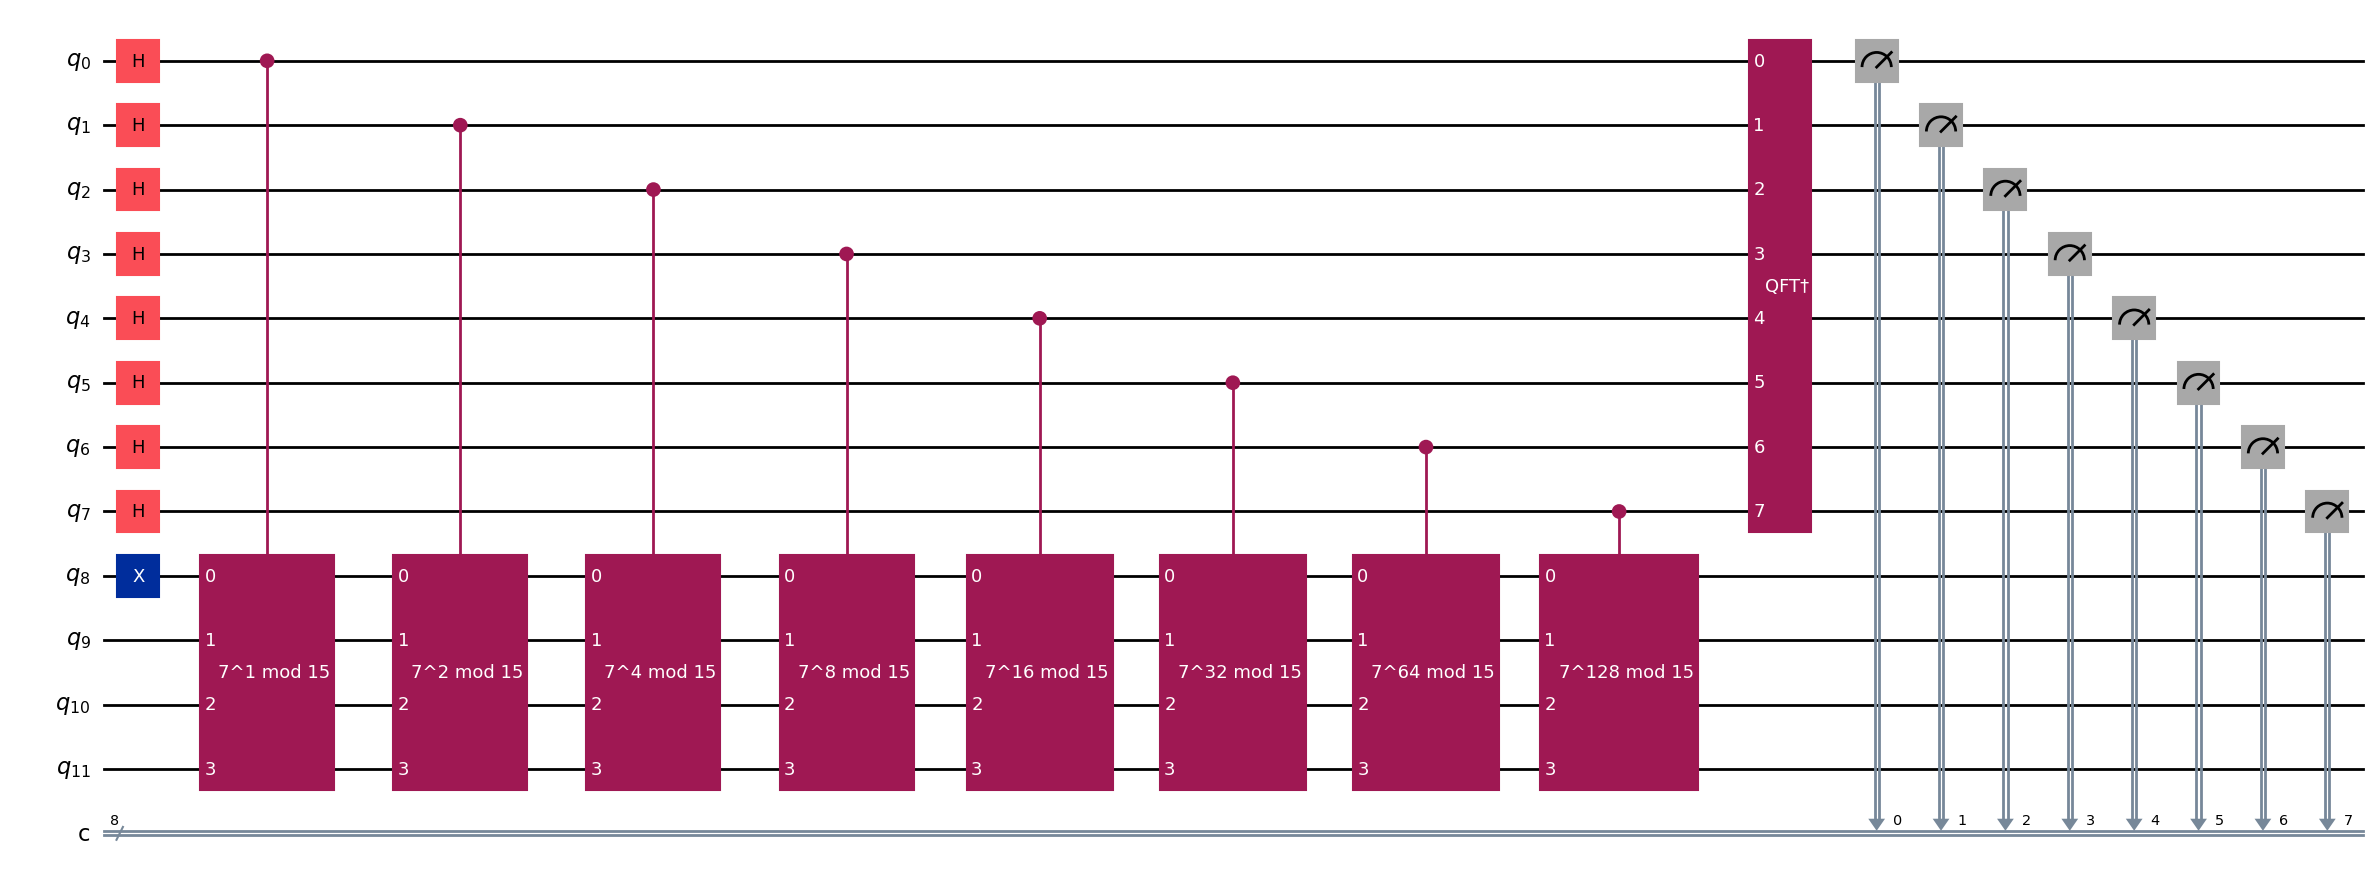

In [244]:
# Construct circuit for Shor's algorithm
dm(r"\text{With these building blocks, we can now construct a circuit for Shor's algorithm.}")

def construct_shor_qc(a, N_COUNT):
    # Create QuantumCircuit with N_COUNT counting qubits
    # plus 4 qubits for U to act on
    qc = QCir(N_COUNT + 4, N_COUNT)

    # Initialize counting qubits
    # in state |+>
    for q in range(N_COUNT):
        qc.h(q)

    # And auxiliary register in state |1>
    qc.x(N_COUNT)

    # Do controlled-U operations
    for q in range(N_COUNT):
        qc.append(c_amod15(a, 2**q),
                [q] + [i+N_COUNT for i in range(4)])

    # Do inverse-QFT
    qc.append(qft_dagger(N_COUNT), range(N_COUNT))

    # Measure circuit
    qc.measure(range(N_COUNT), range(N_COUNT))
    return qc

qc = construct_shor_qc(a, N_COUNT)
qc.draw(fold=-1, output="mpl", style="iqp")  # -1 means 'do not fold'

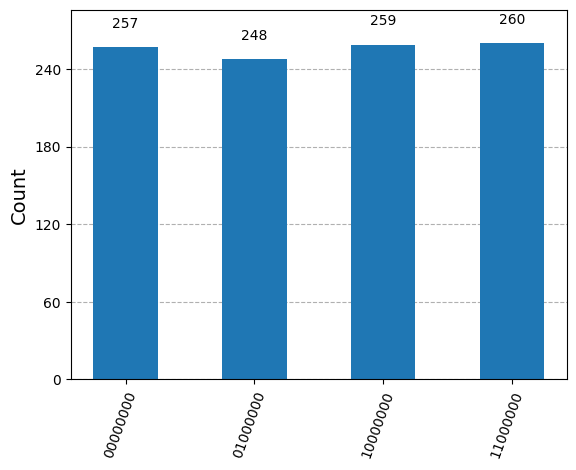

In [245]:
# Plot sampler measurements
def run_shors(shor_qc):
    t_qc = transpile(shor_qc, sampler)
    counts = sampler.run(t_qc).result().get_counts()
    return counts
counts = run_shors(qc)
plot_histogram(counts)

In [246]:
# Define util functions to help interpret results
rows, measured_phases = [], []
def update_phases(counts):
    rows, measured_phases = [], []
    for output in counts:
        decimal = int(output, 2)  # Convert (base 2) string to decimal
        phase = decimal/(2**N_COUNT)  # Find corresponding eigenvalue
        measured_phases.append(phase)
        # Add these values to the rows in our table:
        rows.append([f"{output}(bin) = {decimal:>3}(dec)",
                    f"{decimal}/{2**N_COUNT} = {phase:.2f}"])
    return rows, measured_phases

def print_output(rows):
    # Print the rows in a table
    headers=["Register Output", "Phase"]
    df = pd.DataFrame(rows, columns=headers)
    print(df)

def print_phases(phases):
    rows = []
    for phase in phases:
        frac = Fraction(phase).limit_denominator(15)
        rows.append([phase,
                    f"{frac.numerator}/{frac.denominator}",
                    frac.denominator])
    # Print as a table
    headers=["Phase", "Fraction", "Guess for r"]
    df = pd.DataFrame(rows, columns=headers)
    print(df)

In [247]:
# Show details of phases measured
rows, measured_phases = update_phases(counts)
print_output(rows)

            Register Output           Phase
0  10000000(bin) = 128(dec)  128/256 = 0.50
1  11000000(bin) = 192(dec)  192/256 = 0.75
2  01000000(bin) =  64(dec)   64/256 = 0.25
3  00000000(bin) =   0(dec)    0/256 = 0.00


In [248]:
# Interpret results
print_phases(measured_phases)

   Phase Fraction  Guess for r
0   0.50      1/2            2
1   0.75      3/4            4
2   0.25      1/4            4
3   0.00      0/1            1


Note that that phases for 0.25 and 0.75 both result in our correct r=4, but the other phases result in incorrect guesses. This is because when s=0 or s and r are not coprime, our measurement will be a factor of r instead of r. By using many runs in the sampler, we can determine r as the highest guess and verify it.

#### Exercise: What happens when we use a=2, 8, 11, 13? Explain the results

a = 2

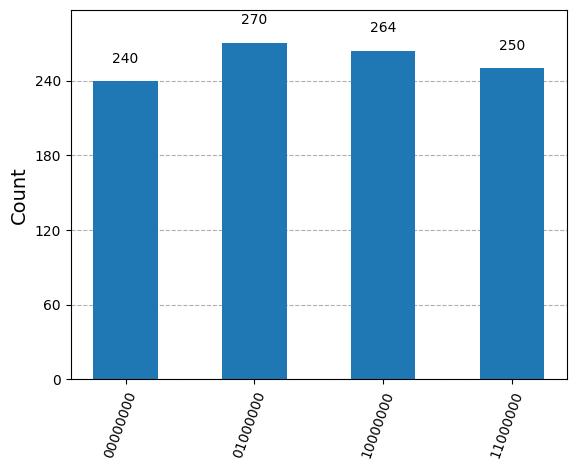

In [249]:
a = 2
qc = construct_shor_qc(a, N_COUNT)
counts = run_shors(qc)
plot_histogram(counts)

In [250]:
rows, measured_phases = update_phases(counts)
print_output(rows)

            Register Output           Phase
0  10000000(bin) = 128(dec)  128/256 = 0.50
1  11000000(bin) = 192(dec)  192/256 = 0.75
2  01000000(bin) =  64(dec)   64/256 = 0.25
3  00000000(bin) =   0(dec)    0/256 = 0.00


In [251]:
print_phases(measured_phases)

   Phase Fraction  Guess for r
0   0.50      1/2            2
1   0.75      3/4            4
2   0.25      1/4            4
3   0.00      0/1            1


For a=2, we see that our best guess for r is again 4.

a=8

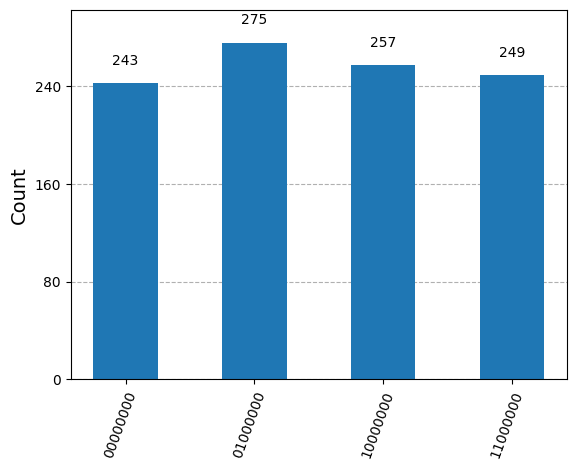

In [252]:
a = 8
qc = construct_shor_qc(a, N_COUNT)
counts = run_shors(qc)
plot_histogram(counts)

In [253]:
rows, measured_phases = update_phases(counts)
print_output(rows)

            Register Output           Phase
0  10000000(bin) = 128(dec)  128/256 = 0.50
1  11000000(bin) = 192(dec)  192/256 = 0.75
2  01000000(bin) =  64(dec)   64/256 = 0.25
3  00000000(bin) =   0(dec)    0/256 = 0.00


In [254]:
print_phases(measured_phases)

   Phase Fraction  Guess for r
0   0.50      1/2            2
1   0.75      3/4            4
2   0.25      1/4            4
3   0.00      0/1            1


For a=8, we see that our best guess for r is again 4.

a=11

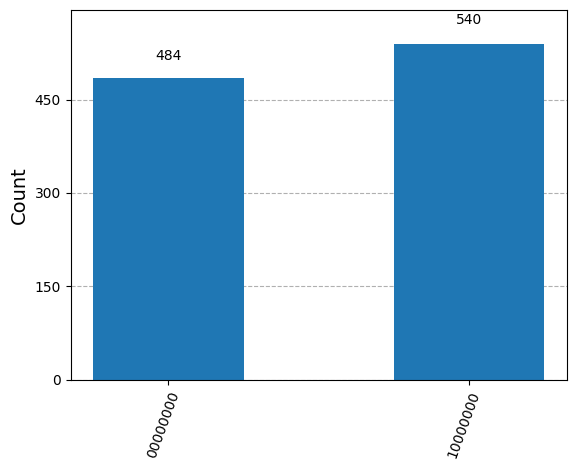

In [255]:
a = 11
qc = construct_shor_qc(a, N_COUNT)
counts = run_shors(qc)
plot_histogram(counts)

In [256]:
rows, measured_phases = update_phases(counts)
print_output(rows)

            Register Output           Phase
0  10000000(bin) = 128(dec)  128/256 = 0.50
1  00000000(bin) =   0(dec)    0/256 = 0.00


In [257]:
print_phases(measured_phases)

   Phase Fraction  Guess for r
0    0.5      1/2            2
1    0.0      0/1            1


For a=11 we see that the highest guess is r=2

r=13

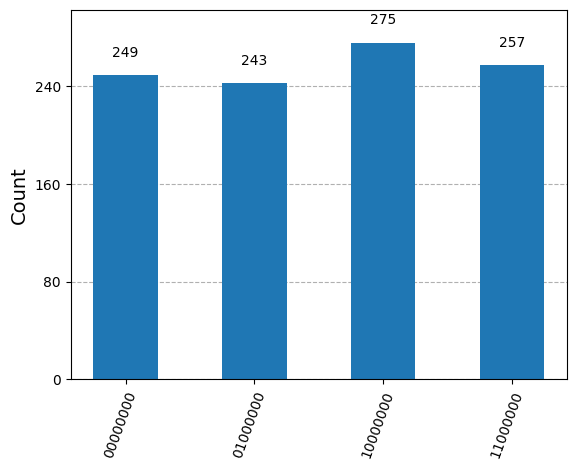

In [258]:
a = 13
qc = construct_shor_qc(a, N_COUNT)
counts = run_shors(qc)
plot_histogram(counts)

In [259]:
rows, measured_phases = update_phases(counts)
print_output(rows)

            Register Output           Phase
0  11000000(bin) = 192(dec)  192/256 = 0.75
1  10000000(bin) = 128(dec)  128/256 = 0.50
2  00000000(bin) =   0(dec)    0/256 = 0.00
3  01000000(bin) =  64(dec)   64/256 = 0.25


In [260]:
print_phases(measured_phases)

   Phase Fraction  Guess for r
0   0.75      3/4            4
1   0.50      1/2            2
2   0.00      0/1            1
3   0.25      1/4            4


We see that for a=13 our best guess is again r=4

In [265]:
# Interpret results of exercise
dm(r"\text{From these results we can determine the periods of the following functions where } U_k \ket{y} := \ket{k y \bmod 15}")
dm(r"\text{For } U_2, U_8, U_{13} : r=4")
dm(r"\text{For } U_{11}: r=2")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Section 4 - Modular Exponentiation

In [270]:
# Describe the issue to solve
dm(r"""
    \text{Note that the method above for creating } U^{2{j}}
    \text{ gates by repeated applications of } U 
    \\\\ \text{ will grow exponentially with } j,
    \text{ resulting in an algorithm that is not polynomial in time.}
""")
dm(r"\text{So we would like a way to efficiently create the operator}")
dm(r"U^{2^j} \ket{y} := \ket{a^{2^j} y \bmod N}")
dm(r"\text{such that it grows polynomially with } j.")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [285]:
# Define modular exponentiation function
dm(r"\text{Because we are limiting our range to exponentials in the form } 2^j \text{ we can use repeated squaring to efficiently calculate } a^{2^j}")
dm(r"\text{This technique takes advantage of the fact that }")
dm(r"ab \bmod N = (a \bmod N)(b \bmod N)")
dm(r"\text{ to reduce a large exponential into many small and simple calculations.}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [286]:
# Define the repeated squaring function
def a2jmodN(a, j, N):
    """Compute a^{2^j} (mod N) by repeated squaring"""
    # Loop over j, calculating a^2 mod N each time
    for _ in range(j):
        a = np.mod(a**2, N)
    # After performing "square mod N" j times, we are left with the result
    return a

In [292]:
# Example of repeated squaring
dm(r"7^{2^{2049}} \bmod 53 = {res}".replace('{res}', str(a2jmodN(7, 2049, 53))))
dm(r"\text{Normally, attempting to calculate } x=2^{2049} \text{ and then } 7^x \bmod 53 \text{ would be a monumental task.}")
dm(r"\text{Instead, our repeated squares function performs the much simpler series of calculations:}")
dm(r"7^2 \bmod 53 = 49")
dm(r"49^2 \bmod 53 = 16")
dm(r"16^2 \bmod 53 = 44")
dm(r"\text{(...2049 times...)}")
dm(r"13^2 \bmod 53 = 10")
dm(r"10^2 \bmod 53 = 47")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Section 5 - Factoring from Period Finding

Not all factoring problems require a quantum approach. There are many shortcuts that can be used by classical algorithms, such as even numbers always having 2 as a factor or when it is of the form a^b. Let's focus on the worst case scenario of trying to factor the product of two prime numbers - this is where the quantum approach performs best.

#### Example: Factoring 15

We know that 15 = 3 * 5, but let's show how a quantum computer solves that.

In [296]:
# Setup the problem to solve
N = 15

# Pick a random a between 1 and N-1
np.random.seed(1) # Ensure reproducable results
a = randint(2, 15)
print(a) # We always get "7" due to the set seed

7


In [300]:
# Double check that gcd(a, N) = 1
assert gcd(a, N) == 1

We're now ready to perform Shor's algorithm for `a = 7` and `N = 15`

In [303]:
# Recall what measurement represents
dm(r"\text{Note that the circuit measurement will represent a possible phase } \phi = \frac{s}{r} \text{ where}")
dm(r"a^r \bmod N = 1")
dm(r"\text{ and random } s \isin \Z^+ ; 0 \leq s \leq r-1")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [304]:
# Define the quantum phase estimation circuit builder
def qpe_amod15(a):
    """Performs quantum phase estimation on the operation a*r mod 15.
    Args:
        a (int): This is 'a' in a*r mod 15
    Returns:
        float: Estimate of the phase
    """
    N_COUNT = 8
    qc = QCir(4+N_COUNT, N_COUNT) # We use 4 qubits for N=15 and N_COUNT counting qubits
    for q in range(N_COUNT):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(N_COUNT) # And auxiliary register in state |1>
    for q in range(N_COUNT): # Do controlled-U operations
        qc.append(c_amod15(a, 2**q), # Use previously defined c_amod15 function as our U
                 [q] + [i+N_COUNT for i in range(4)])
    qc.append(qft_dagger(N_COUNT), range(N_COUNT)) # Do inverse-QFT
    qc.measure(range(N_COUNT), range(N_COUNT))
    # Simulate Results
    # `memory=True` tells the backend to save each measurement in a list
    job = sampler.run(transpile(qc, sampler), shots=1, memory=True) # Simulate a single sampling for this trivial case
    readings = job.result().get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**N_COUNT)
    print(f"Corresponding Phase: {phase}")
    return phase

In [328]:
# Use phase estimator to make a guess at r
phase = qpe_amod15(a) # phase = s/r
phase_frac = Fraction(phase).limit_denominator(15)
s, r = phase_frac.numerator, phase_frac.denominator
print(f"{s} / {r}")

Register Reading: 00000000
Corresponding Phase: 0.0
0 / 1


Let's see if we can use the r from this phase to find a factor

In [329]:
# Check first measurement
dm(r"\phi = \frac01 ; r=0, s=1")
dm(r"\text{By definition, it is true that for any r we find: } a^r \bmod N = 1")
dm(r"\text{Therefore: } (a^r - 1) \bmod N = 0")
dm(r"\text{Which implies that N divides } a^r - 1. \text{While r is even, we can also say}")
dm(r"a^r - 1 = (a^{\frac r2} - 1)(a^{\frac r2} + 1)")
dm(r"\text{(If r is not even, turn back and try another measurement)}")
dm(r"\text{We then find the greatest common divisor of N and the individual terms to check for a proper factor of N}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [332]:
# Calculate guesses for r
guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(guesses)

[15, 1]


This is the trivial result! We must repeat the process until measurement yields a phase where r produces a proper factor of N.

In [338]:
# Create a loop function to repeat until a non-trivial result is found
def repeat_shors(a):
    FACTOR_FOUND = False
    ATTEMPT = 0
    while not FACTOR_FOUND:
        ATTEMPT += 1
        print(f"\nATTEMPT {ATTEMPT}:")
        phase = qpe_amod15(a) # Measure a random phase = s/r
        frac = Fraction(phase).limit_denominator(N) # Determine fractional representation of phase
        r = frac.denominator # Grab the r associated with the measured phase
        print(f"Result: r = {r}")
        if phase != 0: # We just showed why r=0 is the trivial result and can always be skipped
            # Guesses for factors are gcd(x^{r/2} ±1 , 15)
            guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
            print(f"Guessed Factors: {guesses[0]} and {guesses[1]}")
            for guess in guesses:
                if guess not in [1,N] and (N % guess) == 0:
                    # Guess is a factor!
                    print(f"*** Non-trivial factor found: {guess} ***")
                    FACTOR_FOUND = True
    return guesses
guesses = repeat_shors(a)


ATTEMPT 1:
Register Reading: 01000000
Corresponding Phase: 0.25
Result: r = 4
Guessed Factors: 3 and 5
*** Non-trivial factor found: 3 ***
*** Non-trivial factor found: 5 ***


In [339]:
# Ensure results match expectations
assert (3 in guesses) or (5 in guesses)

In this case, we got lucky that the result yielded both factors, 3 and 5. Other phase measurements will give values of r that will only reveal one of the factors instead. However, by dividing the original N by that factor, we retrieve the other factor! In this way, as long as the measurement does not yield the trivial result, then we have successfully factored our N - thus our repeating function is a complete quantum algorithm to factor 15!